# Analysis of Results

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('history\dql_history_1.json', 'r') as file:
    dql1_history = json.load(file)

with open('history\dql_history_2.json', 'r') as file:
    dql2_history = json.load(file)

with open('history\sarsa_history.json', 'r') as file:
    sarsa_history = json.load(file)

with open('history\dueling_dql_history.json', 'r') as file:
    dueling_dql_history = json.load(file)

with open('history\dql_ef_history.json', 'r') as file:
    dql_ef_history = json.load(file)

with open('history\sarsa_ef_history.json', 'r') as file:
    sarsa_ef_history = json.load(file)

with open('history\dueling_dql_ef_history.json', 'r') as file:
    dueling_dql_ef_history = json.load(file)

## Deep Q-Learning Algorithm

We compare the rewards over time of the DQL agent with different learning rates and discount factors.

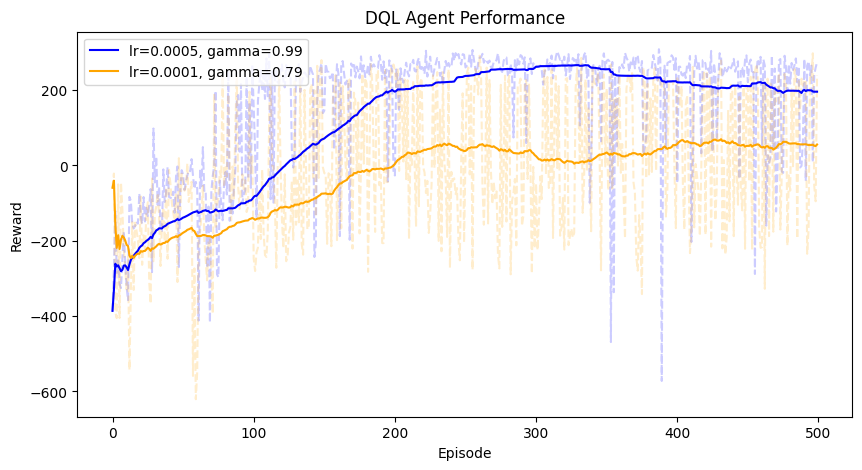

In [3]:
plt.figure(figsize=(10, 5))

plt.plot(dql1_history['reward'], color='blue', linestyle='--', alpha=.2)
plt.plot(dql2_history['reward'], color='orange', linestyle='--', alpha=.2)

plt.plot(dql1_history['avg_reward_100'], color='blue', label='lr=0.0005, gamma=0.99')
plt.plot(dql2_history['avg_reward_100'], color='orange', label='lr=0.0001, gamma=0.79')

plt.title('DQL Agent Performance')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(loc='upper left')

plt.show()

## Comparison of Agents

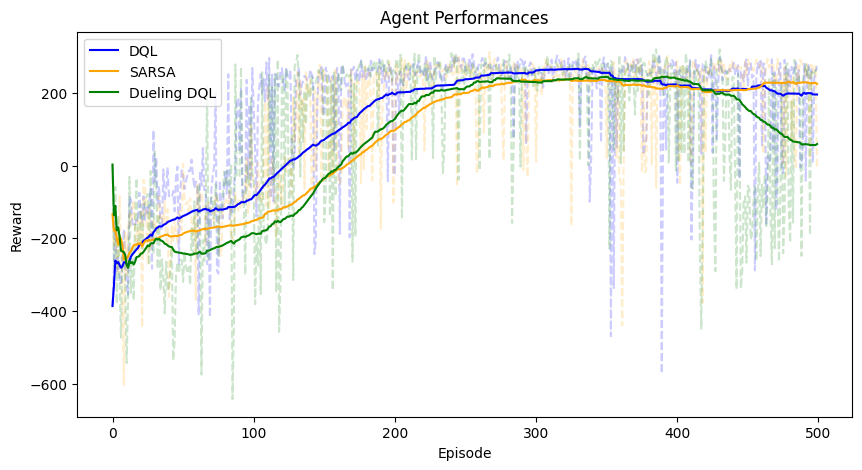

In [4]:
plt.figure(figsize=(10, 5))

plt.plot(dql1_history['reward'], color='blue', linestyle='--', alpha=.2)
plt.plot(sarsa_history['reward'], color='orange', linestyle='--', alpha=.2)
plt.plot(dueling_dql_history['reward'], color='green', linestyle='--', alpha=.2)

plt.plot(dql1_history['avg_reward_100'], color='blue', label='DQL')
plt.plot(sarsa_history['avg_reward_100'], color='orange', label='SARSA')
plt.plot(dueling_dql_history['avg_reward_100'], color='green', label='Dueling DQL')

plt.title('Agent Performances')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(loc='upper left')

plt.show()

## Comparison of Cumulative Rewards

In [5]:
dql_cum_reward = [sum(dql1_history['reward'][:i]) for i in range(1, len(dql1_history['reward']) + 1)]
sarsa_cum_reward = [sum(sarsa_history['reward'][:i]) for i in range(1, len(sarsa_history['reward']) + 1)]
dueling_dql_cum_reward = [sum(dueling_dql_history['reward'][:i]) for i in range(1, len(dueling_dql_history['reward']) + 1)]

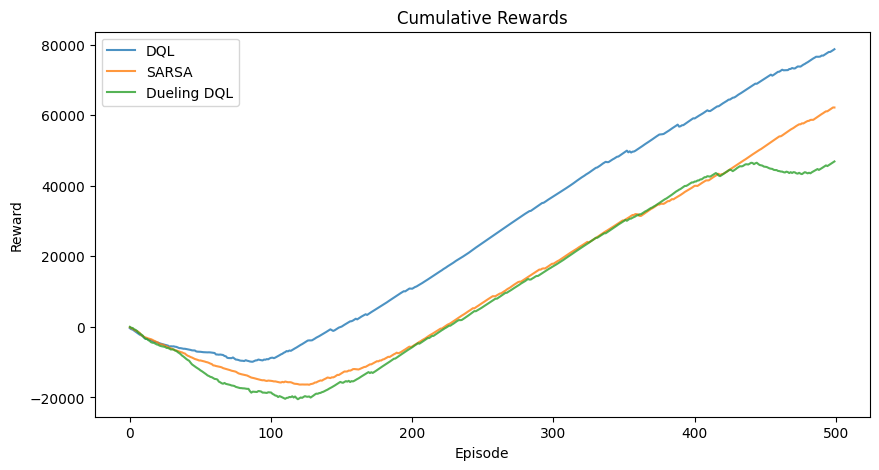

In [6]:
# plot cumulative reward
plt.figure(figsize=(10, 5))

plt.plot(dql_cum_reward, alpha=0.8, label='DQL')
plt.plot(sarsa_cum_reward, alpha=0.8, label='SARSA')
plt.plot(dueling_dql_cum_reward, alpha=0.8, label='Dueling DQL')

plt.title('Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

## Comparison of Episode Length

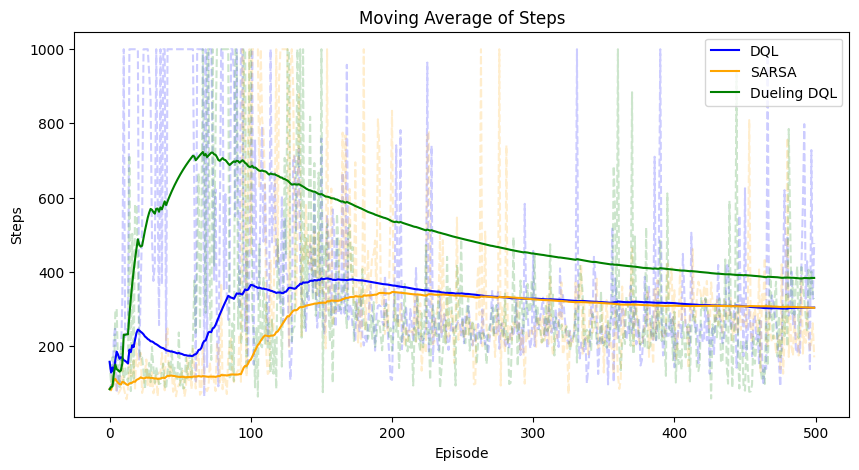

In [7]:
# moving average of steps
dql_ma_steps = [sum(dql1_history['steps'][:i]) / i for i in range(1, len(dql1_history['steps']) + 1)]
sarsa_ma_steps = [sum(sarsa_history['steps'][:i]) / i for i in range(1, len(sarsa_history['steps']) + 1)]
dueling_dql_ma_steps = [sum(dueling_dql_history['steps'][:i]) / i for i in range(1, len(dueling_dql_history['steps']) + 1)]

# plot moving average of steps
plt.figure(figsize=(10, 5))

plt.plot(dql1_history['steps'], alpha=0.2, color='blue', linestyle='--')
plt.plot(sarsa_history['steps'], alpha=0.2, color='orange', linestyle='--')
plt.plot(dueling_dql_history['steps'], alpha=0.2, color='green', linestyle='--')

plt.plot(dueling_dql_ma_steps, color='blue', label='DQL')
plt.plot(sarsa_ma_steps, color='orange', label='SARSA')
plt.plot(dql_ma_steps, color='green', label='Dueling DQL')

plt.title('Moving Average of Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.show()

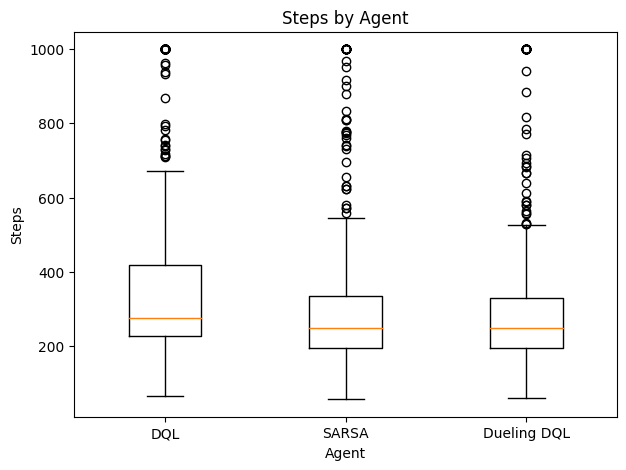

In [8]:
plt.figure(figsize=(7, 5))

plt.boxplot([dql1_history['steps'], 
        sarsa_history['steps'], 
        dueling_dql_history['steps']]
    , labels=['DQL', 'SARSA', 'Dueling DQL'], widths=0.4)

plt.title('Steps by Agent')
plt.xlabel('Agent')
plt.ylabel('Steps')

plt.show()

## Comparison Agents (REF)

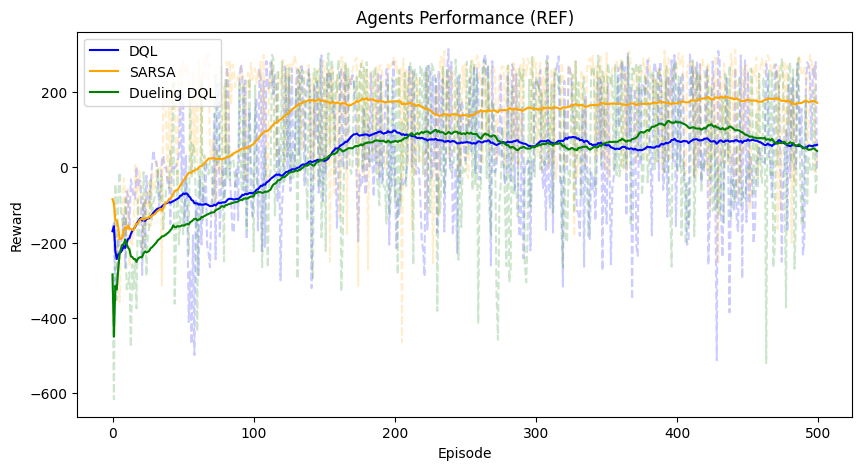

In [9]:
plt.figure(figsize=(10, 5))

plt.plot(dql_ef_history['reward'], color='blue', linestyle='--', alpha=.2)
plt.plot(sarsa_ef_history['reward'], color='orange', linestyle='--', alpha=.2)
plt.plot(dueling_dql_ef_history['reward'], color='green', linestyle='--', alpha=.2)

plt.plot(dql_ef_history['avg_reward_100'], color='blue', label='DQL')
plt.plot(sarsa_ef_history['avg_reward_100'], color='orange', label='SARSA')
plt.plot(dueling_dql_ef_history['avg_reward_100'], color='green', label='Dueling DQL')

plt.title('Agents Performance (REF)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(loc='upper left')

plt.show()

## Comparison of Cumulative Rewards (Engine Failure)

In [10]:
dql_ef_cum_reward = [sum(dql_ef_history['reward'][:i]) for i in range(1, len(dql_ef_history['reward']) + 1)]
sarsa_ef_cum_reward = [sum(sarsa_ef_history['reward'][:i]) for i in range(1, len(sarsa_ef_history['reward']) + 1)]
ddql_ef_cum_reward = [sum(dueling_dql_ef_history['reward'][:i]) for i in range(1, len(dueling_dql_ef_history['reward']) + 1)]

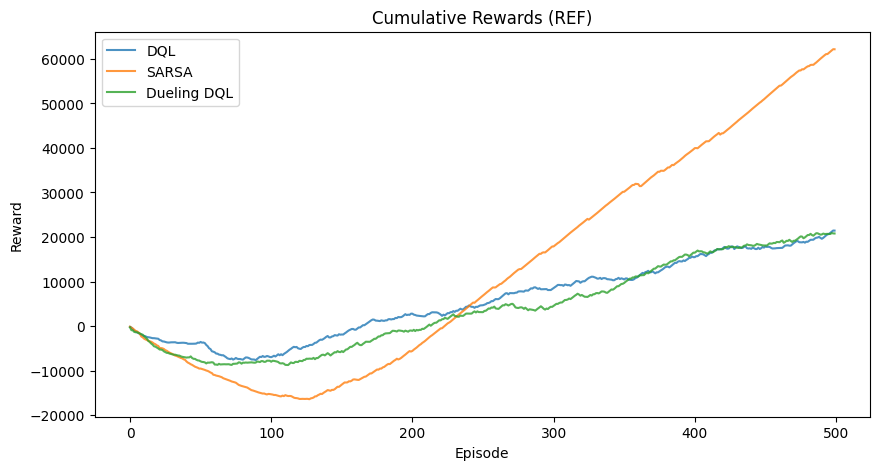

In [11]:
# plot cumulative reward
plt.figure(figsize=(10, 5))

plt.plot(dql_ef_cum_reward, alpha=0.8, label='DQL')
plt.plot(sarsa_cum_reward, alpha=0.8, label='SARSA')
plt.plot(ddql_ef_cum_reward, alpha=0.8, label='Dueling DQL')

plt.title('Cumulative Rewards (REF)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

## Comparison of Episode Length (REF)

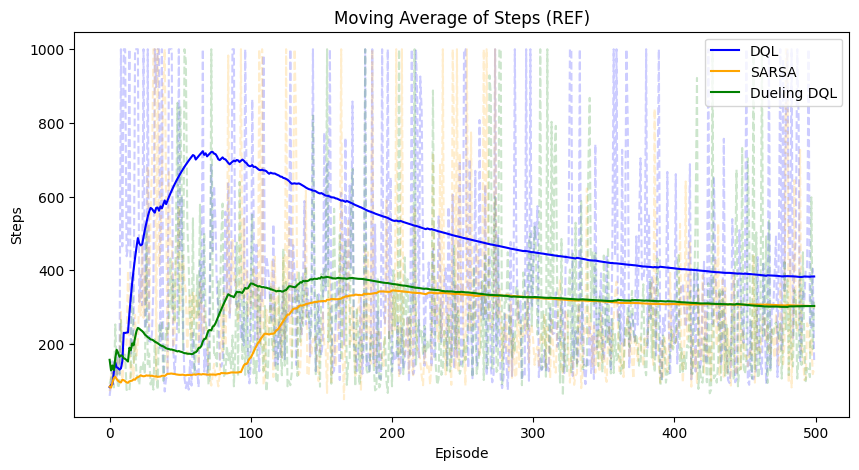

In [12]:
# moving average of steps
dql_ef_ma_steps = [sum(dql_ef_history['steps'][:i]) / i for i in range(1, len(dql_ef_history['steps']) + 1)]
sarsa_ef_ma_steps = [sum(sarsa_ef_history['steps'][:i]) / i for i in range(1, len(sarsa_ef_history['steps']) + 1)]
dueling_dql_ef_ma_steps = [sum(dueling_dql_ef_history['steps'][:i]) / i for i in range(1, len(dueling_dql_ef_history['steps']) + 1)]

# plot moving average of steps
plt.figure(figsize=(10, 5))

plt.plot(dql_ef_history['steps'], alpha=0.2, color='blue', linestyle='--')
plt.plot(sarsa_ef_history['steps'], alpha=0.2, color='orange', linestyle='--')
plt.plot(dueling_dql_ef_history['steps'], alpha=0.2, color='green', linestyle='--')

plt.plot(dql_ma_steps, color='blue', label='DQL')
plt.plot(sarsa_ma_steps, color='orange', label='SARSA')
plt.plot(dueling_dql_ma_steps, color='green', label='Dueling DQL')

plt.title('Moving Average of Steps (REF)')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.show()

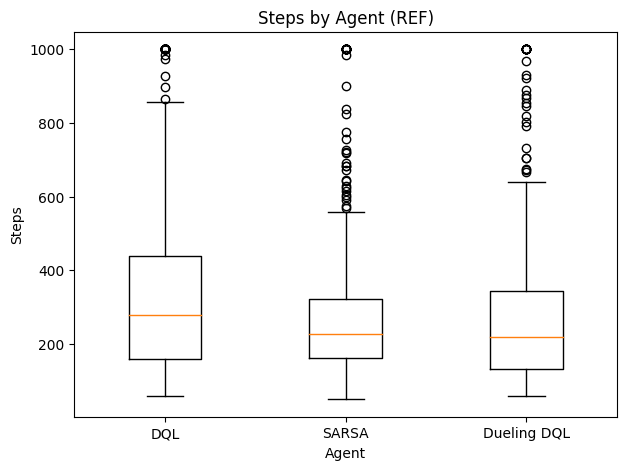

In [13]:
plt.figure(figsize=(7, 5))

plt.boxplot([dql_ef_history['steps'], 
        sarsa_ef_history['steps'], 
        dueling_dql_ef_history['steps']]
    , labels=['DQL', 'SARSA', 'Dueling DQL'], widths=0.4)

plt.title('Steps by Agent (REF)')
plt.xlabel('Agent')
plt.ylabel('Steps')

plt.show()